# Import Libraries

In [31]:
import pandas as pd
from matplotlib import pyplot as plt

# Import Dataset

In [17]:
df = pd.read_csv('final.csv')

# Dataset Visualization

In [18]:
df.head()

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,AA_Obfuscated,OpenAction_Obfuscated,AcroForm_Obfuscated,JBIG2Decode_Obfuscated,RichMedia_Obfuscated,Launch_Obfuscated,EmbeddedFile_Obfuscated,XFA_Obfuscated,pageno_Obfuscated,Malicious
0,83f83a146afebd65ad7256e690d671e8,17,260,1,12,0,0,0,0,No,...,0,0,0,0,0,0,0,1,0,No
1,88217c219170bbeb22724ce9282a2ade,183,390,8,231,38,0,0,0,Yes,...,0,0,0,0,0,0,0,8,0,No
2,9e12bb303beaaa619b6ead1b0c7a2670,60,388,3,52,78,0,0,0,Yes,...,0,0,0,0,0,0,0,3,0,No
3,2f088911733a9bc928b806a3267255f2,14,330,2,19,35,0,0,0,Yes,...,0,0,0,0,0,0,0,2,0,No
4,fd44308e1fe91bf9e030922c5e5463ba,14,224,0,20,7,0,0,0,No,...,0,0,0,0,0,0,0,1,0,Yes


In [19]:
# Check for same PDFs

print(len(df))
print(len(df['MD5']))

30828
30828


In [23]:
temp = df.copy()
temp = temp.drop(columns=['MD5'])

In [24]:
# Removing duplicates

print(len(temp))
temp.drop_duplicates
print(len(temp))

30828
30828


In [25]:
temp.columns

Index(['pdfsize', 'metadata size', 'pages', 'xref length', 'title characters',
       'isEncrypted', 'embedded files', 'images', 'contains text', '\theader',
       'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer', 'startxref',
       'pageno', 'Encrypt', 'ObjStm', 'JS', 'JavaScript', 'AA', 'OpenAction',
       'AcroForm', 'JBIG2Decode', 'RichMedia', 'Launch', 'EmbeddedFile', 'XFA',
       'URI', 'Colors', 'JS_Obfuscated', 'JavaScript_Obfuscated',
       'AA_Obfuscated', 'OpenAction_Obfuscated', 'AcroForm_Obfuscated',
       'JBIG2Decode_Obfuscated', 'RichMedia_Obfuscated', 'Launch_Obfuscated',
       'EmbeddedFile_Obfuscated', 'XFA_Obfuscated', 'pageno_Obfuscated',
       'Malicious'],
      dtype='object')

## Analysis of isEncrypted Column

In [27]:
temp['isEncrypted'].value_counts()

isEncrypted
 0    30719
 1      107
-1        2
Name: count, dtype: int64

In [28]:
temp[temp['Malicious'] == 'Yes']['isEncrypted'].value_counts()

isEncrypted
 0    21683
 1       37
-1        1
Name: count, dtype: int64

In [29]:
temp[temp['Malicious'] == 'No']['isEncrypted'].value_counts()

isEncrypted
 0    9036
 1      70
-1       1
Name: count, dtype: int64

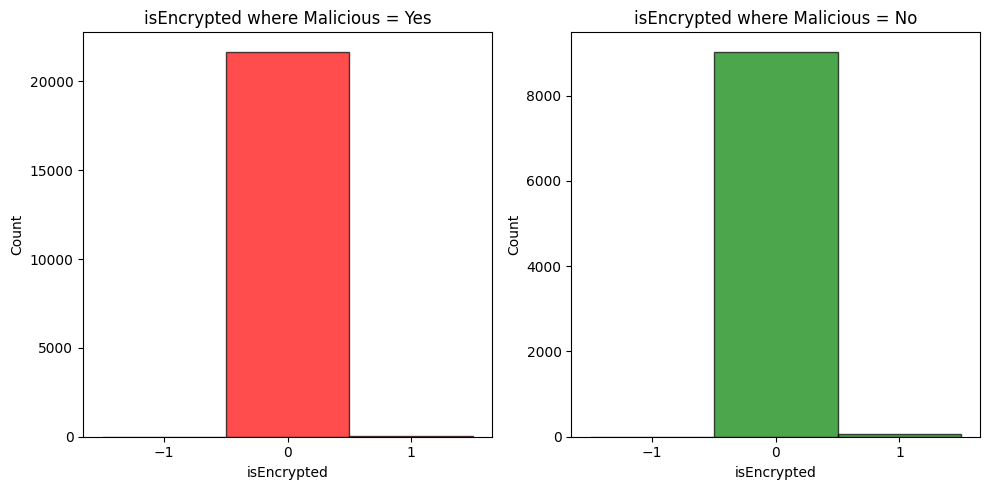

In [32]:
malicious_yes = temp[temp['Malicious'] == 'Yes']['isEncrypted']
malicious_no = temp[temp['Malicious'] == 'No']['isEncrypted']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(malicious_yes, bins=[-1.5, -0.5, 0.5, 1.5], color='red', edgecolor='black', alpha=0.7)
ax1.set_title('isEncrypted where Malicious = Yes')
ax1.set_xlabel('isEncrypted')
ax1.set_ylabel('Count')
ax1.set_xticks([-1, 0, 1])

ax2.hist(malicious_no, bins=[-1.5, -0.5, 0.5, 1.5], color='green', edgecolor='black', alpha=0.7)
ax2.set_title('isEncrypted where Malicious = No')
ax2.set_xlabel('isEncrypted')
ax2.set_ylabel('Count')
ax2.set_xticks([-1, 0, 1])

plt.tight_layout()
plt.show()

## Analysis of Header Column

In [34]:
temp['\theader'].value_counts()

\theader
\t%PDF-1.3     14063
\t%PDF-1.4      5445
\t%PDF-1.6      3232
\t%PDF-1.7      2457
\t%PDF-1.2      1636
\tMalformed     1312
\t%PDF-1.0      1130
\t%PDF-1.5      1032
\t%PDF-1.1       521
Name: count, dtype: int64

In [35]:
temp[temp['Malicious'] == 'Yes']['\theader'].value_counts()

\theader
\t%PDF-1.3     12785
\t%PDF-1.4      2670
\t%PDF-1.6      2224
\tMalformed     1312
\t%PDF-1.0      1127
\t%PDF-1.5       685
\t%PDF-1.1       376
\t%PDF-1.7       352
\t%PDF-1.2       190
Name: count, dtype: int64

In [37]:
temp[temp['Malicious'] == 'No']['\theader'].value_counts()

\theader
\t%PDF-1.4    2775
\t%PDF-1.7    2105
\t%PDF-1.2    1446
\t%PDF-1.3    1278
\t%PDF-1.6    1008
\t%PDF-1.5     347
\t%PDF-1.1     145
\t%PDF-1.0       3
Name: count, dtype: int64

C:\Users\Himanshu Shekhar\AppData\Local\Temp\ipykernel_17628\271315599.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(malicious_yes.unique(), rotation=45, ha="right")
C:\Users\Himanshu Shekhar\AppData\Local\Temp\ipykernel_17628\271315599.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(malicious_no.unique(), rotation=45, ha="right")
C:\Users\Himanshu Shekhar\AppData\Local\Temp\ipykernel_17628\271315599.py:18: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Analysis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


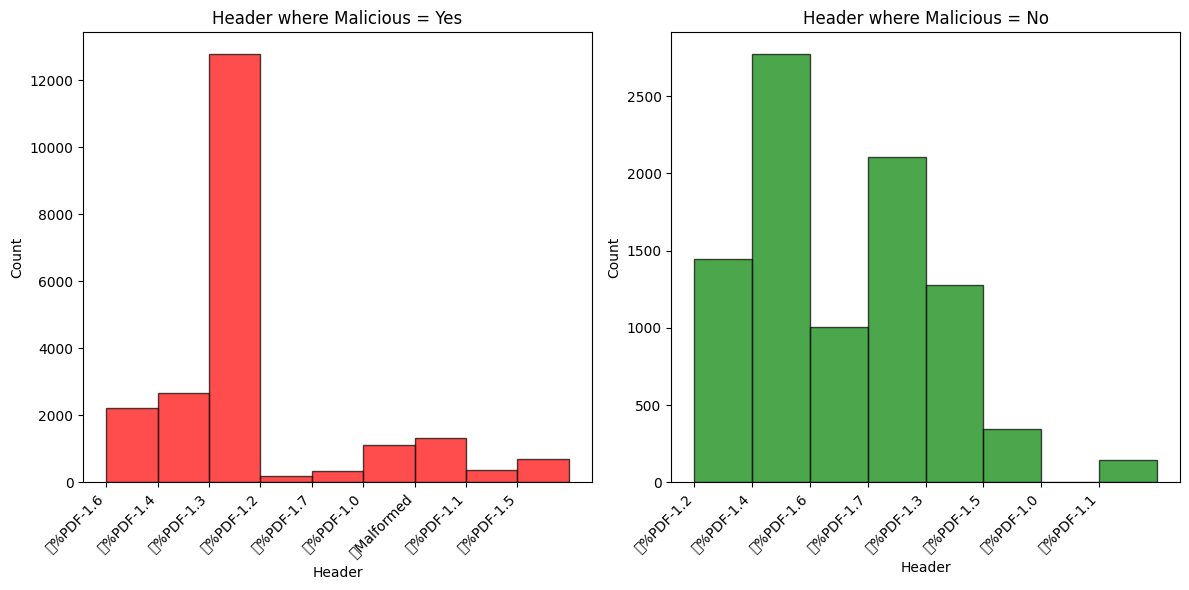

In [39]:
malicious_yes = temp[temp['Malicious'] == 'Yes']['\theader']
malicious_no = temp[temp['Malicious'] == 'No']['\theader']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(malicious_yes, bins=range(len(malicious_yes.unique())+1), color='red', edgecolor='black', alpha=0.7)
ax1.set_title('Header where Malicious = Yes')
ax1.set_xlabel('Header')
ax1.set_ylabel('Count')
ax1.set_xticklabels(malicious_yes.unique(), rotation=45, ha="right")

ax2.hist(malicious_no, bins=range(len(malicious_no.unique())+1), color='green', edgecolor='black', alpha=0.7)
ax2.set_title('Header where Malicious = No')
ax2.set_xlabel('Header')
ax2.set_ylabel('Count')
ax2.set_xticklabels(malicious_no.unique(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [40]:
temp.columns

Index(['pdfsize', 'metadata size', 'pages', 'xref length', 'title characters',
       'isEncrypted', 'embedded files', 'images', 'contains text', '\theader',
       'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer', 'startxref',
       'pageno', 'Encrypt', 'ObjStm', 'JS', 'JavaScript', 'AA', 'OpenAction',
       'AcroForm', 'JBIG2Decode', 'RichMedia', 'Launch', 'EmbeddedFile', 'XFA',
       'URI', 'Colors', 'JS_Obfuscated', 'JavaScript_Obfuscated',
       'AA_Obfuscated', 'OpenAction_Obfuscated', 'AcroForm_Obfuscated',
       'JBIG2Decode_Obfuscated', 'RichMedia_Obfuscated', 'Launch_Obfuscated',
       'EmbeddedFile_Obfuscated', 'XFA_Obfuscated', 'pageno_Obfuscated',
       'Malicious'],
      dtype='object')

## Analysis of Obfuscated Columns

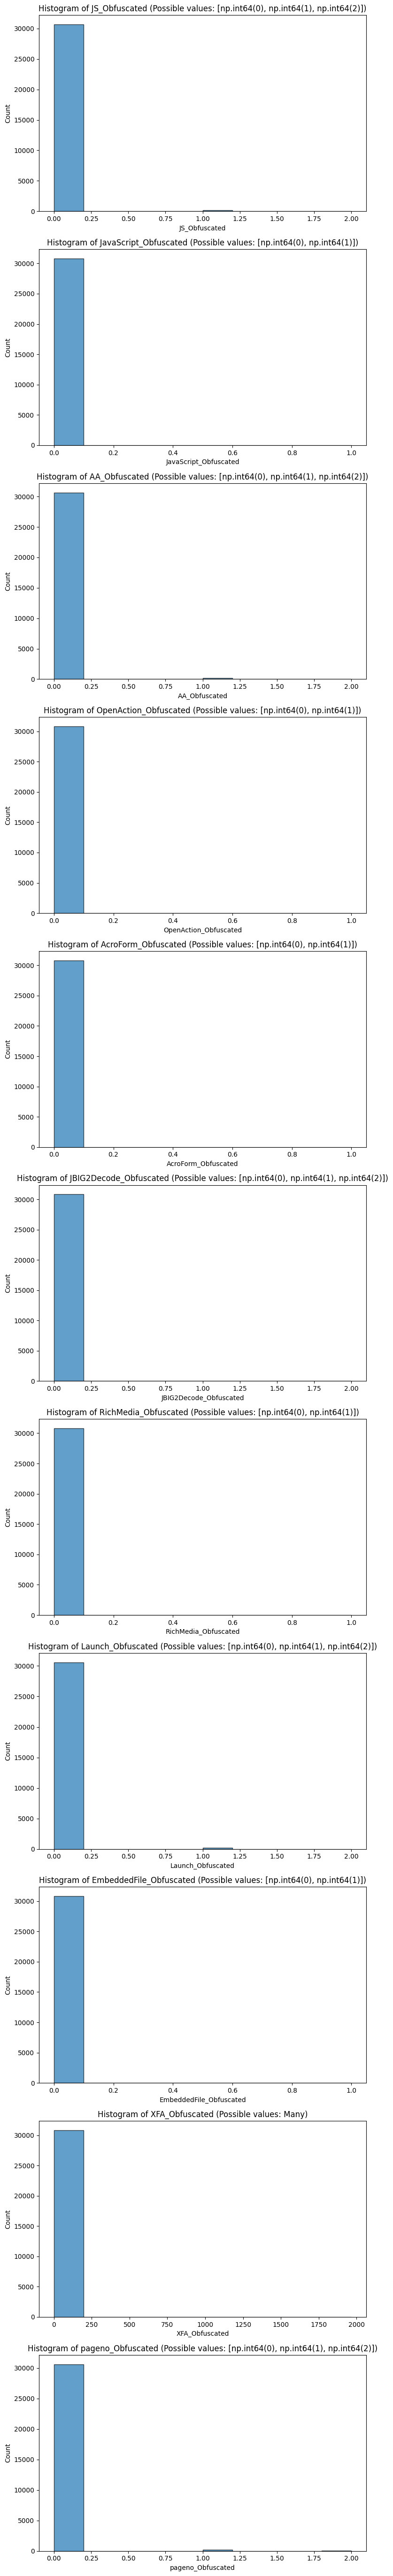

In [51]:
# Get columns that end with '_Obfuscated'
obfuscated_columns = [col for col in temp.columns if col.endswith('_Obfuscated')]

# Create a figure with subplots (one for each '_Obfuscated' column)
num_cols = len(obfuscated_columns)
fig, axes = plt.subplots(nrows=num_cols, figsize=(8, 5 * num_cols))

# If there's only one column, axes might not be iterable, so handle that case
if num_cols == 1:
    axes = [axes]

# Plot a histogram for each obfuscated column
for ax, col in zip(axes, obfuscated_columns):
    unique_values = temp[col].unique()
    ax.hist(temp[col], bins=10, edgecolor='black', alpha=0.7)
    
    # Set the title to include the unique values
    values = sorted(unique_values)
    if(len(values)>5):
        values = "Many"
    ax.set_title(f'Histogram of {col} (Possible values: {values})')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()